In [6]:
# import libraries
from cil.optimisation.functions import L1Norm, MixedL21Norm
from cil.optimisation.operators import BlockOperator, GradientOperator, IdentityOperator
from cil.optimisation.algorithms import PDHG
from cil.framework import ImageGeometry
from cil.utilities.dataexample import TestData
from cil.utilities.display import plotter2D

import matplotlib.pyplot as plt
import numpy as np

import os, sys

In [2]:
# Load an image from the CIL gallery. 
loader = TestData(data_dir=os.path.join(sys.prefix, 'share','cil'))
data = loader.load(TestData.BOAT)
ig = data.geometry

In [8]:
# Add gaussian noise
noisy_data = TestData.random_noise(data, mode = 's&p', amount=0.3, seed = 10)

In [9]:
alpha = 0.8

F = alpha * MixedL21Norm()
G = L1Norm(b=noisy_data)
K = GradientOperator(ig)

# Compute operator Norm
normK = K.norm()

# Primal & dual stepsizes
sigma = 1.
tau = 1/(sigma*normK**2)

# Setup and run the PDHG algorithm
pdhg = PDHG(f=F, g=G, operator=K, tau=tau, sigma=sigma,
            max_iteration = 500, update_objective_interval = 100)
pdhg.run(verbose=0)

Initialised GradientOperator with C backend running with  20  threads
PDHG setting up
PDHG configured


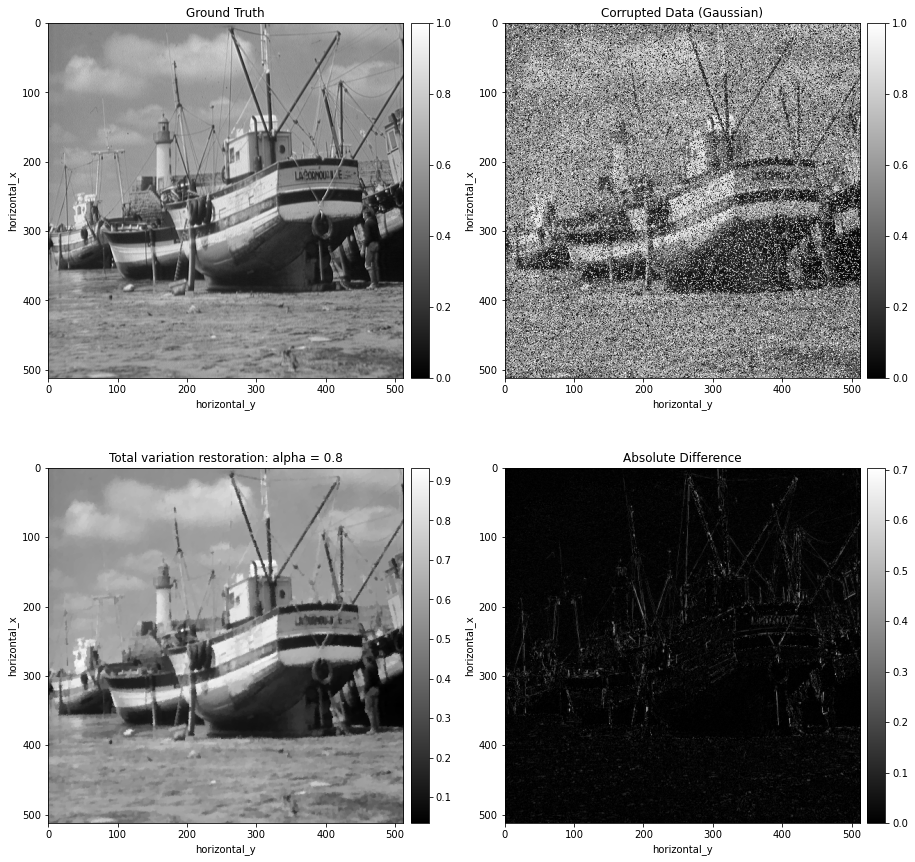

In [10]:
plotter2D([data, noisy_data, pdhg.solution, (pdhg.solution-data).abs()],
          titles=["Ground Truth", 
                  "Corrupted Data (Gaussian)", 
                  "Total variation restoration: alpha = {}".format(alpha),
                  "Absolute Difference"],
         origin = "upper")